In [12]:
from src.datasets.great_lakes_new import Lake, Split, LakesRandom, BaseConfig, TrainConfig, Label
from torch.utils.data import DataLoader
from src.models.basic_cnn import AndreaNet
import torch
import matplotlib.pyplot as plt

In [4]:
data_directory = "/home/dsola/repos/PGA-Net/data/patch20"
lakes = [Lake.erie]
label = Label.binary
batch_size = 10
epochs = 10
train_epoch_size, test_epoch_size = 500, 250
device = 'cpu'

base_config = BaseConfig(data_directory=data_directory, lakes=lakes, label=label)

train_config = TrainConfig(*base_config, batch_size=batch_size, epochs=epochs,
                           epoch_size=train_epoch_size, device=device)

train_set = LakesRandom(train_config)
train_loader = DataLoader(train_set, batch_size=train_config.batch_size, shuffle=True)

In [24]:
for batch in train_loader:
    img, ice_con = batch
    break

In [25]:
ice_con

tensor([[0, 1],
        [0, 1],
        [1, 0],
        [0, 1],
        [0, 1],
        [1, 0],
        [0, 1],
        [0, 1],
        [1, 0],
        [0, 1]])

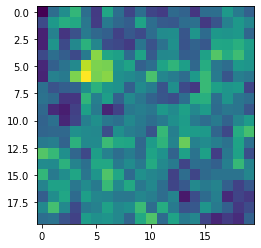

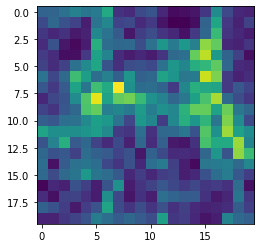

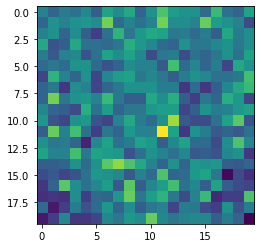

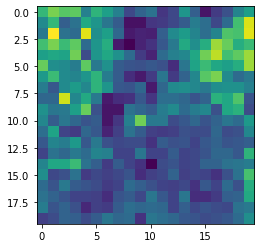

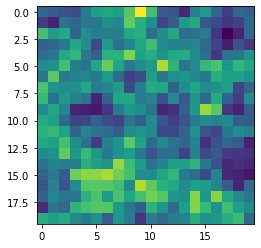

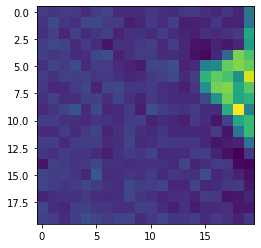

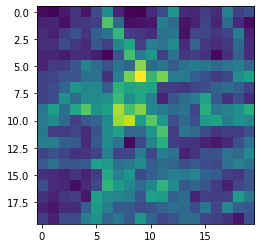

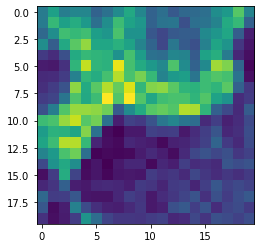

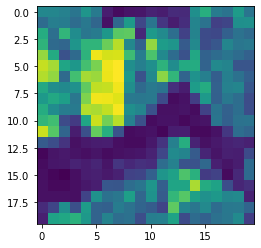

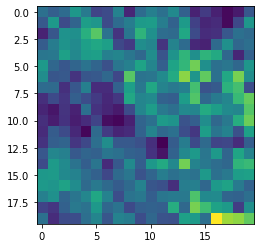

In [26]:
for i in range(10):
    plt.imshow(img[i][0].detach().numpy())
    plt.show()

In [8]:
net_1 = AndreaNet(classes=5)
net_2 = AndreaNet(classes=2)

In [12]:
x = net_1(img.to(device=device, dtype=torch.float32))
print(x)
torch.argmax(x, dim=1)

tensor([[0.2351, 0.1788, 0.2005, 0.2067, 0.1788],
        [0.2230, 0.1750, 0.2071, 0.2344, 0.1605],
        [0.2343, 0.1735, 0.1932, 0.2370, 0.1620],
        [0.2216, 0.1844, 0.2041, 0.2056, 0.1844],
        [0.2202, 0.1837, 0.2067, 0.2056, 0.1837],
        [0.2189, 0.1779, 0.2094, 0.2161, 0.1779],
        [0.2210, 0.1824, 0.2087, 0.2056, 0.1824],
        [0.2209, 0.1819, 0.2066, 0.2087, 0.1819],
        [0.2279, 0.1805, 0.2035, 0.2075, 0.1805],
        [0.2232, 0.1790, 0.2077, 0.2109, 0.1790]], grad_fn=<SoftmaxBackward>)


tensor([0, 3, 3, 0, 0, 0, 0, 0, 0, 0])

In [7]:
net_2(img.to(device=device, dtype=torch.float32))

tensor([[0.5404, 0.4596],
        [0.5284, 0.4716],
        [0.5384, 0.4616],
        [0.5143, 0.4857],
        [0.5227, 0.4773],
        [0.5139, 0.4861],
        [0.5167, 0.4833],
        [0.5273, 0.4727],
        [0.5301, 0.4699],
        [0.5433, 0.4567]], grad_fn=<SoftmaxBackward>)

In [8]:
net_1(img.to(device=device, dtype=torch.float32))

/home/dsola/anaconda3/envs/PGA-Net/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


tensor([[0.0690],
        [0.1302],
        [0.0902],
        [0.0736],
        [0.1022],
        [0.0781],
        [0.0780],
        [0.0786],
        [0.0753],
        [0.0793]], grad_fn=<ReluBackward0>)

In [11]:
net_2(img.to(device=device, dtype=torch.float32))

tensor([[0.1768, 0.1005],
        [0.1296, 0.0000],
        [0.1523, 0.1337],
        [0.1863, 0.1318],
        [0.1569, 0.1265],
        [0.1621, 0.1319],
        [0.1996, 0.1323],
        [0.1474, 0.0961],
        [0.1826, 0.1437],
        [0.1443, 0.0860]], grad_fn=<ReluBackward0>)

In [11]:
ice_con.shape

torch.Size([5])

In [17]:
ice_con[0].item()

1.0

In [15]:
torch.Tensor.type(ice_con)

'torch.DoubleTensor'